In [1]:
import numpy as np
import pandas as pd

import pickle

import scipy
import scipy.sparse as sp

import scripts.training.Dataset_split as dtspl

In [2]:
PROGRAM_FOLDER = ".."
INPUT_DATA_FOLDER = "data/final_data"
MODEL_FOLDER = "model"
FINAL_TRAIN_MATRIX = "final_train_matrix_v1.pkl"
FINAL_DATETIMES = "final_datetimes_v1"
FINAL_Y = "final_y_v1"
TUNING_FOLDER = f"{MODEL_FOLDER}/tuning"
alarm_classifier = "alarm_classifier"
alarm_classifier_version = "v1"

In [3]:
#read data from files
df_work_v3 = pd.read_csv(f"../{INPUT_DATA_FOLDER}/df_work_v3.csv", sep=";")
tfidf_vector_all = pickle.load(open(f"../{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [4]:
df_work_v3

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
0,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,...,1022.0,24.1,0.0,0.0,0.0,10.0,3,0,3,0
1,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,...,1023.0,24.1,0.0,0.0,0.0,10.0,3,0,3,0
2,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,...,1023.6,10.0,90.0,NaN,NaN,10.0,3,0,3,4
3,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,...,1024.0,24.1,63.6,0.0,0.0,10.0,3,0,3,4
4,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,...,1024.0,24.1,73.6,0.0,0.0,10.0,3,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191710,2023-01-20,11.2,5.7,7.9,6.2,89.3,0.6,12.5,16.8,1.4,...,1010.0,24.1,100.0,0.0,0.0,10.0,2,0,2,3
191711,2023-01-20,11.2,5.7,7.9,6.2,89.3,0.6,12.5,16.8,1.4,...,1010.8,10.0,30.0,0.0,0.0,10.0,2,0,2,4
191712,2023-01-20,11.2,5.7,7.9,6.2,89.3,0.6,12.5,16.8,1.4,...,1011.0,24.1,100.0,0.0,0.0,10.0,2,0,2,3
191713,2023-01-20,11.2,5.7,7.9,6.2,89.3,0.6,12.5,16.8,1.4,...,1011.0,24.1,100.0,0.0,0.0,10.0,2,0,2,3


In [5]:
columns_to_drop = ['day_solarradiation', 'day_solarenergy', 'day_uvindex', 'hour_visibility', 'hour_solarradiation', 'hour_uvindex']

In [6]:
df_work_v3.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
#print(df_work_v3['hour_precip'].isna().sum())
#df_work_v3

In [8]:
#df_precip=df_work_v3['hour_precip'].to_frame()
#df_precip

In [9]:
#df_precip_fix1=df_precip.fillna(method='bfill')
#df_precip_fix1=df_precip.interpolate()
#df_precip_fix1

In [10]:
#modified_rows = df_precip_fix1.index[df_precip_fix1.ne(df_precip).any(axis=1)]

#df_precip_fix1.loc[modified_rows]

In [11]:
df_work_v3.interpolate(inplace=True)

In [12]:
#creating df sorted by datetime
df_work_v3['datetime'] = pd.to_datetime(df_work_v3['day_datetime'] + ' ' + df_work_v3['hour_datetime'])
df_work_v3.drop(['day_datetime', 'hour_datetime'], axis=1, inplace=True)
df_sorted = df_work_v3.sort_values('datetime')

In [13]:
#separating datetime to split the df
df_datetime = df_sorted['datetime']
df_datetime = df_datetime.to_frame()

In [14]:
df_sorted.drop(['datetime'], axis=1, inplace=True)
df_x=df_sorted.drop(["is_alarm"], axis=1)
y = df_sorted['is_alarm']

In [35]:
#print(pd.Series(df_x.index == y.index).value_counts()[False])

KeyError: False

In [16]:
#print(df_x.index == df_sorted.index)

[ True  True  True ...  True  True  True]


In [47]:
print(df_datetime.loc[df_datetime['datetime']==pd.to_datetime("2022-02-26 00:00:00")])

         datetime
0      2022-02-26
167500 2022-02-26
159608 2022-02-26
151693 2022-02-26
143371 2022-02-26
135513 2022-02-26
7906   2022-02-26
126982 2022-02-26
119084 2022-02-26
110697 2022-02-26
102871 2022-02-26
95071  2022-02-26
86863  2022-02-26
78090  2022-02-26
68415  2022-02-26
16354  2022-02-26
60189  2022-02-26
51953  2022-02-26
44112  2022-02-26
36193  2022-02-26
175685 2022-02-26
183770 2022-02-26
25430  2022-02-26


In [17]:
df_sorted

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_moonphase,hour_temp,hour_humidity,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_cloudcover,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
0,6.3,-1.5,1.9,-2.7,73.4,0.000,0.00,0.84,0.3,82.07,...,14.4,7.9,294.8,1022.0,0.0,10.0,3,0,3,0
167500,5.1,-1.0,1.6,-1.7,79.5,0.000,0.00,0.84,-0.1,82.63,...,3.6,1.8,260.0,1018.0,100.0,10.0,23,0,23,3
159608,5.3,0.1,2.7,-2.8,68.5,0.100,4.17,0.84,2.4,85.39,...,13.3,6.8,299.7,1023.0,98.2,10.0,9,0,9,3
151693,6.0,-4.0,0.1,-4.1,78.2,0.000,0.00,0.84,-3.0,100.00,...,15.8,0.0,0.0,1022.0,44.6,10.0,13,0,13,4
143371,5.4,-1.3,1.7,-1.6,80.4,0.000,0.00,0.84,-0.1,92.97,...,16.2,8.6,355.5,1018.0,94.8,10.0,16,0,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135512,8.9,4.7,6.4,5.5,93.7,1.200,8.33,0.93,6.4,88.26,...,22.0,10.8,140.0,1013.0,100.0,10.0,6,0,6,3
119083,7.9,1.3,4.0,0.1,76.5,6.000,4.17,0.93,1.3,85.27,...,31.3,16.9,94.0,1018.0,100.0,10.0,8,0,8,3
51952,9.0,1.2,4.0,2.6,91.2,2.481,12.50,0.93,1.5,95.35,...,21.6,7.5,300.0,1009.1,100.0,10.0,24,0,24,3
16353,11.9,3.2,7.0,3.3,78.2,0.000,0.00,0.93,3.2,83.65,...,21.6,18.0,120.0,1016.7,100.0,10.0,11,0,11,3


In [19]:
#print(df_datetime.dtypes)

datetime    datetime64[ns]
dtype: object


In [20]:
#print(df_sorted.dtypes)

day_tempmax           float64
day_tempmin           float64
day_temp              float64
day_dew               float64
day_humidity          float64
day_precip            float64
day_precipcover       float64
day_moonphase         float64
hour_temp             float64
hour_humidity         float64
hour_dew              float64
hour_precip           float64
hour_precipprob       float64
hour_snow             float64
hour_snowdepth        float64
hour_windgust         float64
hour_windspeed        float64
hour_winddir          float64
hour_pressure         float64
hour_cloudcover       float64
hour_severerisk       float64
region_id_x             int64
is_alarm                int64
region_id_y             int64
hour_conditions_id      int64
dtype: object


In [21]:
df_work_v4_csr = scipy.sparse.csr_matrix(df_x.values)
df_work_v4_csr.shape

(191715, 24)

In [22]:
df_all_features = sp.hstack((df_work_v4_csr, tfidf_vector_all), format='csr')
df_all_features.shape

(191715, 9026)

In [34]:
print(df_all_features)

  (0, 0)	6.3
  (0, 1)	-1.5
  (0, 2)	1.9
  (0, 3)	-2.7
  (0, 4)	73.4
  (0, 7)	0.84
  (0, 8)	0.3
  (0, 9)	82.07
  (0, 10)	-2.4
  (0, 15)	14.4
  (0, 16)	7.9
  (0, 17)	294.8
  (0, 18)	1022.0
  (0, 20)	10.0
  (0, 21)	3.0
  (0, 22)	3.0
  (0, 8985)	0.11857799072401437
  (0, 8980)	0.062443659083071784
  (0, 8940)	0.10370899561521361
  (0, 8923)	0.02171118646719135
  (0, 8888)	0.021724501906642837
  (0, 8861)	0.02008155068935402
  (0, 8854)	0.011833657434587511
  (0, 8853)	0.02030176390281383
  (0, 8834)	0.01625335460235323
  :	:
  (191714, 259)	0.018253624561182964
  (191714, 254)	0.018834137987196676
  (191714, 238)	0.006762777733893114
  (191714, 222)	0.028986563611399105
  (191714, 212)	0.017307203825760245
  (191714, 207)	0.023012136038989685
  (191714, 199)	0.03506941820926559
  (191714, 192)	0.015383494288570455
  (191714, 185)	0.013169958474197968
  (191714, 182)	0.026624168268218264
  (191714, 176)	0.013613515606944985
  (191714, 157)	0.02036107214863311
  (191714, 135)	0.0159223953242

In [24]:
with open(f"{PROGRAM_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_TRAIN_MATRIX}", 'wb') as handle:
     pickle.dump(df_all_features, handle)

In [25]:
df_datetime.to_csv(f"{PROGRAM_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_DATETIMES}.csv", index=False)

In [26]:
with open(f"{PROGRAM_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_DATETIMES}.pkl", 'wb') as handle:
     pickle.dump(df_datetime, handle)

In [27]:
type(df_all_features)

scipy.sparse._csr.csr_matrix

In [28]:
y

0         0
167500    0
159608    0
151693    0
143371    0
         ..
135512    0
119083    0
51952     0
16353     0
191714    0
Name: is_alarm, Length: 191715, dtype: int64

In [29]:
with open(f"{PROGRAM_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_Y}.pkl", 'wb') as handle:
     pickle.dump(y, handle)

In [30]:
y.to_csv(f"{PROGRAM_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_Y}.csv", index=False)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.model_selection import TimeSeriesSplit

In [49]:
#raise SystemExit("Stop right there!")

In [61]:
TUNING_PATH = f"{PROGRAM_FOLDER}/{TUNING_FOLDER}"
MODEL_NAME = "logistic_regression_v5"
RANDOM_STATE=1

In [66]:
iteration = 1
tss = TimeSeriesSplit(n_splits=7)
MIN_ITERATION = 5
MAX_ITERATION = 7

#getting indexes for df_all_features from splitting df_datetime

for train_index, test_index in zip(*dtspl.split_dataset(df_datetime, tss)):
    if(iteration<MIN_ITERATION):
        iteration+=1
        continue
    if(iteration>MAX_ITERATION):
        break

    model=LogisticRegression(max_iter=100,random_state=RANDOM_STATE, )

    X_train=df_all_features[train_index]
    X_test=df_all_features[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    print(f"{MODEL_NAME}_iter{iteration}: {score}")
    with open(f"{TUNING_PATH}/{MODEL_NAME}/{MODEL_NAME}_iter{iteration}.pkl", 'wb') as handle: pickle.dump(model, handle)
    iteration+=1


logistic_regression_v5_iter5: 0.8534098360655737


C:\Users\IvarY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
1-y.sum()/y.count()

0.7455285188952352

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
logistic = LogisticRegression()
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0, 1),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50]
}
random_search = RandomizedSearchCV(
    estimator=logistic,
    param_distributions=param_distributions,
    n_iter=10,
    cv=tss,
    random_state=42
)

In [ ]:
random_search.fit(df_all_features, y)
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

In [68]:
import matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [69]:
def plot_confusion_matrix(clf, y_test, predicted):
    classes = clf.classes_
    classes[0], classes[1] = classes[1], classes[0]

    cm = confusion_matrix(y_test, predicted, labels=classes)
    cm = cm.T

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    plt=disp.plot()
    #plt.show()

In [ ]:
df_sorted.shape

In [ ]:
best_model=random_search.best_estimator_
for train_index, test_index in zip(*dtspl.split_dataset(df_datetime, tss)):

    X_test=df_all_features[test_index]
    y_test=y[test_index]
    prediction=best_model.predict(X_test)
    plot_confusion_matrix(best_model, y_test, prediction)



In [ ]:
iteration=1
tss = TimeSeriesSplit(n_splits=3)


#getting indexes for df_all_features from splitting df_datetime

for train_index, test_index in zip(*dtspl.split_dataset(df_datetime, tss)):
    model=LogisticRegression(max_iter=1000,random_state=RANDOM_STATE, C=0.5247564316322378, penalty='l2', solver='newton-cg')

    X_train=df_all_features[train_index]
    X_test=df_all_features[test_index]
    y_train=y[train_index]
    y_test=y[test_index]

    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    print(f"{MODEL_NAME}_split{iteration}: {score}")
    with open(f"{TUNING_PATH}/{MODEL_NAME}_iter{iteration}.pkl", 'wb') as handle: pickle.dump(model, handle)
    iteration+=1

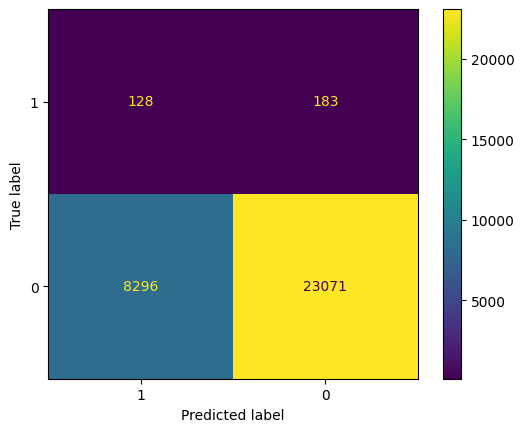

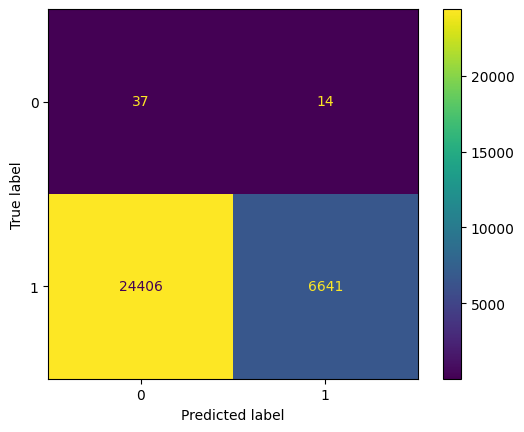

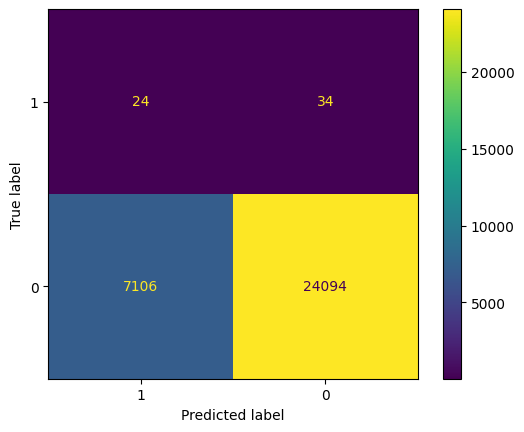

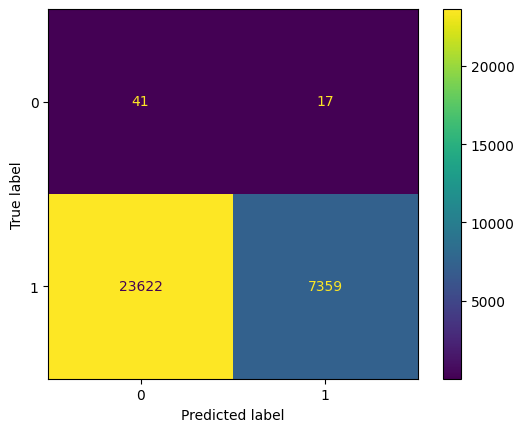

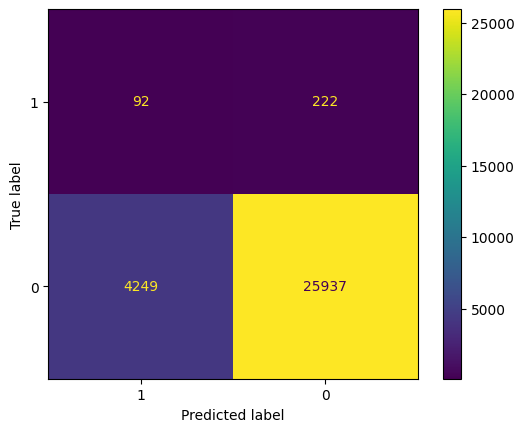

In [70]:
for train_index, test_index in zip(*dtspl.split_dataset(df_datetime, tss)):

    X_test=df_all_features[test_index]
    y_test=y[test_index]
    prediction=model.predict(X_test)
    plot_confusion_matrix(model, y_test, prediction)